In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the dataset
dataset = pd.read_csv('dataset_Facebook.csv',delimiter=';')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
Page total likes                                                       500 non-null int64
Type                                                                   500 non-null object
Category                                                               500 non-null int64
Post Month                                                             500 non-null int64
Post Weekday                                                           500 non-null int64
Post Hour                                                              500 non-null int64
Paid                                                                   499 non-null float64
Lifetime Post Total Reach                                              500 non-null int64
Lifetime Post Total Impressions                                        500 non-null int64
Lifetime Engaged Users                                                 500 non-nul

In [4]:
dataset.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [5]:
#Renaming the columns
dataset.columns = ['TotalLikes','Type','Category','PostMonth','PostWeekday','PostHour','Paid','TotalReach','TotalImpressions',
                  'EngagedUsers','PostConsumers','PostConsumption','PostImpressions','PostReach','LifetimePeople','Comment','Like','Share','TotalInteractions']

In [6]:
dataset.head()

,TotalLikes,Type,Category,PostMonth,PostWeekday,PostHour,Paid,TotalReach,TotalImpressions,EngagedUsers,PostConsumers,PostConsumption,PostImpressions,PostReach,LifetimePeople,Comment,Like,Share,TotalInteractions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [7]:
#Checking for missing values in the dataset
dataset.isnull().values.any()

True

In [8]:
#Checking the total number of rows with missing values
dataset.isnull().any(axis = 1).sum()

5

In [9]:
dataset['TotalLikes'].isnull().values.any()

False

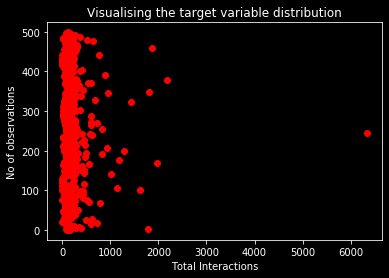

In [10]:
#Visualising the dataset
plt.style.use('dark_background')
plt.figure(figsize=(6,4))
plt.scatter(dataset['TotalInteractions'],list(range(0,len(dataset))),c='red')
plt.xlabel('Total Interactions')
plt.ylabel('No of observations')
plt.title('Visualising the target variable distribution')
plt.show()

In [11]:
#Splitting the dataset into features and dependent variable
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [12]:
# Replacing the missing values with the mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(x[:,2:]) 
x[:,2:] = imputer.transform(x[:,2:])

In [13]:
print(x[0])

[139441 'Photo' 2.0 12.0 4.0 3.0 0.0 2752.0 5091.0 178.0 109.0 159.0
 3078.0 1640.0 119.0 4.0 79.0 17.0]


In [14]:
print(y)

[ 100  164   80 1777  393  186  279  339  192  142  252  106  104  152
  599  108   54  713   75   42   81    0   18   96  121  106  494  117
  622  174  162   39  204  125   75  199  113  100  269   59  262  211
   36   46   58   71  214   32   92   14   58  337  242   87   83   81
  220   53   90  160  123  162  202  245   69  119   55  787   70  119
  162  550  273  233  114  505    0   97   64   38  101  441  252  122
  117  158  163  311   39  126  421   91  342  129  148  185   65  142
  378  430    0 1626   79   17   72 1136  222  238  148  271   34    0
  139   97   17    6  458    7    9    8    2  232    4    6    7    9
  242   10    5    3   10   10   10   12   34   68   48   39  154  100
  202  265 1009  447   53   96  204   94  179   35  367  200  454  193
  387   70  163  137  252   98  409  282  410  288   18  132   84  557
 1974  121  217   38  228  225  243  189 1174  276  299  194  199  114
  271  472   90   72  263   67  117  164  119  818   70  133  490  330
   73 

In [15]:
#Encoding the categorical feature
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
x=np.array(ct.fit_transform(x))
print(x[0])

[0.0 1.0 0.0 0.0 139441 2.0 12.0 4.0 3.0 0.0 2752.0 5091.0 178.0 109.0
 159.0 3078.0 1640.0 119.0 4.0 79.0 17.0]


In [16]:
#Splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

---

### Polynomial Regression model

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x_train)

In [18]:
# Training the Polynomial Regression model on the training set
from sklearn.linear_model import LinearRegression
poly_regressor = LinearRegression()
poly_regressor.fit(x_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
# Predicting test results
y_pred = poly_regressor.predict(poly_reg.fit_transform(x_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[ 4.37e+02  4.21e+02]
 [ 8.27e+02  8.23e+02]
 [ 4.93e+01  3.90e+01]
 [ 5.43e+01  6.30e+01]
 [ 9.58e+01  9.50e+01]
 [ 1.22e+02  1.08e+02]
 [ 6.97e+01  7.50e+01]
 [ 1.22e+02  1.03e+02]
 [ 1.06e+02  9.80e+01]
 [ 1.66e+02  1.93e+02]
 [ 1.39e+02  1.44e+02]
 [ 8.68e+01  8.50e+01]
 [ 5.91e+01  6.20e+01]
 [ 6.36e+01  6.70e+01]
 [ 4.29e+01  3.80e+01]
 [ 1.77e+02  1.80e+02]
 [ 3.35e+02  3.05e+02]
 [ 1.79e+02  1.88e+02]
 [ 3.90e+02  3.87e+02]
 [ 1.14e+02  1.00e+02]
 [ 4.78e+01  4.20e+01]
 [ 3.50e+02  3.55e+02]
 [ 6.50e+02  6.24e+02]
 [ 1.42e+02  1.48e+02]
 [ 1.46e+02  7.10e+01]
 [ 3.85e+00  4.90e+01]
 [-1.67e+01  0.00e+00]
 [ 1.83e+02  1.89e+02]
 [ 4.25e+01  6.50e+01]
 [ 6.06e+01  5.40e+01]
 [ 1.35e+01  2.00e+00]
 [ 1.79e+01  9.00e+00]
 [ 1.80e+01  7.00e+00]
 [ 7.93e+02  8.18e+02]
 [ 6.69e+01  7.50e+01]
 [-7.60e+01  1.37e+02]
 [ 1.00e+02  9.90e+01]
 [ 1.29e+02  1.25e+02]
 [ 4.31e+02  4.29e+02]
 [ 1.23e+02  1.28e+02]
 [ 8.04e+01  8.30e+01]
 [ 1.45e+02  2.14e+02]
 [-8.45e+01  4.20e+02]
 [ 2.12e+02

In [20]:
# Calculating R2 score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.875096763651565

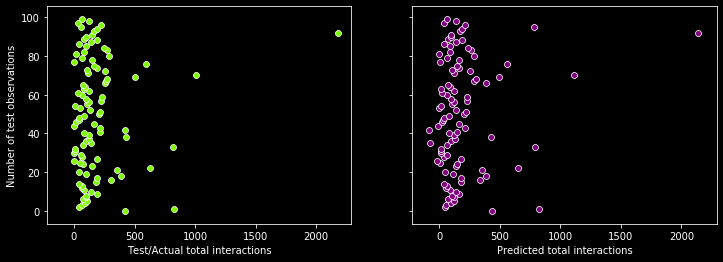

In [22]:
## Visualising the test and actual results for Polynomial Regression model
mylist = list(range(0,len(y_pred)))
plt.style.use('dark_background')
fig, axes = plt.subplots(1,2,figsize=(12,4),sharex=True,sharey=True,squeeze=False)
s1 = sns.scatterplot(y_test,mylist,color='lawngreen',ax=axes[0][0])
s2 = sns.scatterplot(y_pred,mylist,color='purple',ax=axes[0][1])
s1.set_xlabel('Test/Actual total interactions')
s2.set_xlabel('Predicted total interactions')
plt.setp(axes[:, 0], ylabel='Number of test observations')
plt.show()

---

### Multiple Linear Regression model

In [23]:
# Training the multiple linear model on the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
# Predicting test results
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[ 4.22e+02  4.21e+02]
 [ 8.25e+02  8.23e+02]
 [ 4.09e+01  3.90e+01]
 [ 6.32e+01  6.30e+01]
 [ 9.49e+01  9.50e+01]
 [ 1.07e+02  1.08e+02]
 [ 7.54e+01  7.50e+01]
 [ 1.05e+02  1.03e+02]
 [ 9.79e+01  9.80e+01]
 [ 1.89e+02  1.93e+02]
 [ 1.42e+02  1.44e+02]
 [ 8.37e+01  8.50e+01]
 [ 6.50e+01  6.20e+01]
 [ 6.37e+01  6.70e+01]
 [ 3.70e+01  3.80e+01]
 [ 1.81e+02  1.80e+02]
 [ 3.04e+02  3.05e+02]
 [ 1.86e+02  1.88e+02]
 [ 3.83e+02  3.87e+02]
 [ 9.68e+01  1.00e+02]
 [ 4.11e+01  4.20e+01]
 [ 3.52e+02  3.55e+02]
 [ 6.25e+02  6.24e+02]
 [ 1.46e+02  1.48e+02]
 [ 7.10e+01  7.10e+01]
 [ 5.23e+01  4.90e+01]
 [-4.79e+00  0.00e+00]
 [ 1.91e+02  1.89e+02]
 [ 6.30e+01  6.50e+01]
 [ 5.29e+01  5.40e+01]
 [ 1.76e+00  2.00e+00]
 [ 6.35e+00  9.00e+00]
 [ 3.22e+01  7.00e+00]
 [ 8.20e+02  8.18e+02]
 [ 7.51e+01  7.50e+01]
 [ 1.36e+02  1.37e+02]
 [ 1.00e+02  9.90e+01]
 [ 1.24e+02  1.25e+02]
 [ 4.30e+02  4.29e+02]
 [ 1.25e+02  1.28e+02]
 [ 8.48e+01  8.30e+01]
 [ 2.18e+02  2.14e+02]
 [ 4.18e+02  4.20e+02]
 [ 2.10e+02

In [25]:
# Calculating r2 score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9997682929983558

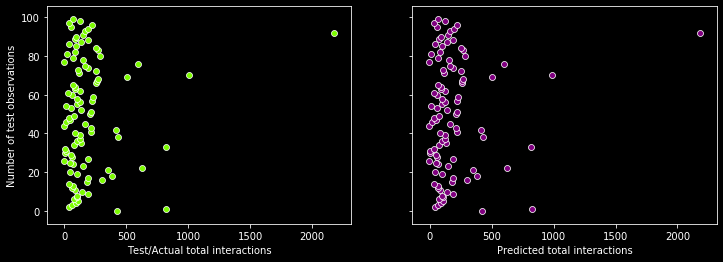

In [26]:
## Visualising the test and actual results for Multiple Linear Regression model
plt.style.use('dark_background')
fig, axes = plt.subplots(1,2,figsize=(12,4),sharex=True,sharey=True,squeeze=False)
s1 = sns.scatterplot(y_test,mylist,color='lawngreen',ax=axes[0][0])
s2 = sns.scatterplot(y_pred,mylist,color='purple',ax=axes[0][1])
s1.set_xlabel('Test/Actual total interactions')
s2.set_xlabel('Predicted total interactions')
plt.setp(axes[:, 0], ylabel='Number of test observations')
plt.show()

In [27]:
#Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train[:,[4,6,7,8,10,11,12,13,14,15,16,17,18,19,20]] =sc_x.fit_transform(x_train[:,[4,6,7,8,10,11,12,13,14,15,16,17,18,19,20]])
x_test[:,[4,6,7,8,10,11,12,13,14,15,16,17,18,19,20]] =sc_x.fit_transform(x_test[:,[4,6,7,8,10,11,12,13,14,15,16,17,18,19,20]])
sc_y=StandardScaler()
y_train = sc_y.fit_transform(np.reshape(y_train,(len(y_train),1)))
print(x_train)

[[0.0 0.0 1.0 ... 0.3847517910795669 0.03038232406517495
  0.0006068112584388749]
 [0.0 1.0 0.0 ... -0.2609854806623636 -0.32566736589627404
  -0.4110986818681327]
 [0.0 0.0 0.0 ... 0.3847517910795669 0.783677535884439 1.2140545804735972]
 ...
 [0.0 1.0 0.0 ... -0.34708378356128766 -0.516933728272259
  -0.6061170733491402]
 [1.0 0.0 0.0 ... -0.08878887486451545 -0.48456557463940003
  -0.43276739203268905]
 [0.0 0.0 1.0 ... 1.2887839715182696 -0.05789445856989505
  -0.021061898906117524]]


---

### Random Forest Regression

In [28]:
# Training the Random Forest Regression model on the training set
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,random_state=0)
regressor.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [29]:
#Predicting test results
y_pred = sc_y.inverse_transform(regressor.predict(x_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[4.85e+02 4.21e+02]
 [1.15e+03 8.23e+02]
 [1.06e+01 3.90e+01]
 [4.16e+01 6.30e+01]
 [8.77e+01 9.50e+01]
 [9.60e+01 1.08e+02]
 [5.54e+01 7.50e+01]
 [8.62e+01 1.03e+02]
 [8.87e+01 9.80e+01]
 [2.28e+02 1.93e+02]
 [1.46e+02 1.44e+02]
 [7.26e+01 8.50e+01]
 [3.60e+01 6.20e+01]
 [4.86e+01 6.70e+01]
 [2.79e+00 3.80e+01]
 [1.89e+02 1.80e+02]
 [3.94e+02 3.05e+02]
 [1.85e+02 1.88e+02]
 [4.76e+02 3.87e+02]
 [7.73e+01 1.00e+02]
 [1.73e+01 4.20e+01]
 [4.87e+02 3.55e+02]
 [7.90e+02 6.24e+02]
 [1.33e+02 1.48e+02]
 [4.93e+01 7.10e+01]
 [5.45e+00 4.90e+01]
 [1.81e+00 0.00e+00]
 [1.90e+02 1.89e+02]
 [3.69e+01 6.50e+01]
 [2.47e+01 5.40e+01]
 [2.58e+00 2.00e+00]
 [2.72e+00 9.00e+00]
 [3.05e+00 7.00e+00]
 [1.16e+03 8.18e+02]
 [5.75e+01 7.50e+01]
 [1.55e+02 1.37e+02]
 [8.74e+01 9.90e+01]
 [1.24e+02 1.25e+02]
 [6.11e+02 4.29e+02]
 [1.21e+02 1.28e+02]
 [6.64e+01 8.30e+01]
 [2.61e+02 2.14e+02]
 [6.00e+02 4.20e+02]
 [2.38e+02 2.12e+02]
 [1.51e+00 0.00e+00]
 [1.84e+02 1.64e+02]
 [2.58e+00 1.50e+01]
 [7.49e+00 4.

In [30]:
## Calculating r2 score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8752883254462024

In [31]:
mylist = list(range(0,len(y_pred)))
#mylist = np.reshape(mylist,(len(mylist),1))

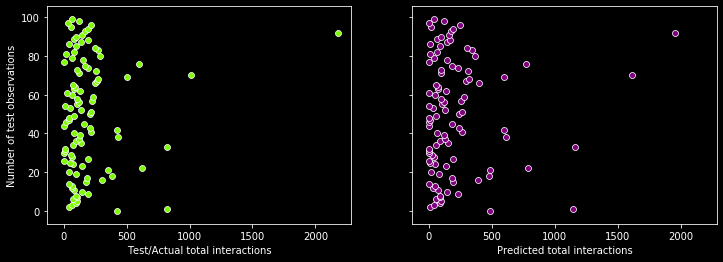

In [32]:
## Visualising the test and actual results for Random Forest Regression model
plt.style.use('dark_background')
fig, axes = plt.subplots(1,2,figsize=(12,4),sharex=True,sharey=True,squeeze=False)
s1 = sns.scatterplot(y_test,mylist,color='lawngreen',ax=axes[0][0])
s2 = sns.scatterplot(y_pred,mylist,color='purple',ax=axes[0][1])
s1.set_xlabel('Test/Actual total interactions')
s2.set_xlabel('Predicted total interactions')
plt.setp(axes[:, 0], ylabel='Number of test observations')
plt.show()

---

### Decision Tree Regression

In [33]:
## Training the decision tree regression model on the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [34]:
## Predicting test results
y_pred = sc_y.inverse_transform(regressor.predict(x_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[4.47e+02 4.21e+02]
 [1.29e+03 8.23e+02]
 [1.00e+01 3.90e+01]
 [4.10e+01 6.30e+01]
 [8.60e+01 9.50e+01]
 [9.70e+01 1.08e+02]
 [4.90e+01 7.50e+01]
 [9.00e+01 1.03e+02]
 [8.40e+01 9.80e+01]
 [2.82e+02 1.93e+02]
 [1.43e+02 1.44e+02]
 [8.70e+01 8.50e+01]
 [3.40e+01 6.20e+01]
 [4.90e+01 6.70e+01]
 [4.00e+00 3.80e+01]
 [2.04e+02 1.80e+02]
 [3.78e+02 3.05e+02]
 [2.02e+02 1.88e+02]
 [4.47e+02 3.87e+02]
 [7.00e+01 1.00e+02]
 [2.10e+01 4.20e+01]
 [4.90e+02 3.55e+02]
 [7.71e+02 6.24e+02]
 [1.49e+02 1.48e+02]
 [5.40e+01 7.10e+01]
 [2.00e+00 4.90e+01]
 [0.00e+00 0.00e+00]
 [2.02e+02 1.89e+02]
 [3.80e+01 6.50e+01]
 [2.50e+01 5.40e+01]
 [4.00e+00 2.00e+00]
 [4.00e+00 9.00e+00]
 [2.00e+00 7.00e+00]
 [1.29e+03 8.18e+02]
 [5.60e+01 7.50e+01]
 [1.60e+02 1.37e+02]
 [8.30e+01 9.90e+01]
 [1.36e+02 1.25e+02]
 [5.87e+02 4.29e+02]
 [1.15e+02 1.28e+02]
 [6.70e+01 8.30e+01]
 [2.55e+02 2.14e+02]
 [5.87e+02 4.20e+02]
 [2.38e+02 2.12e+02]
 [0.00e+00 0.00e+00]
 [1.94e+02 1.64e+02]
 [4.00e+00 1.50e+01]
 [9.00e+00 4.

In [35]:
## Calculating r2 score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8811801703021787

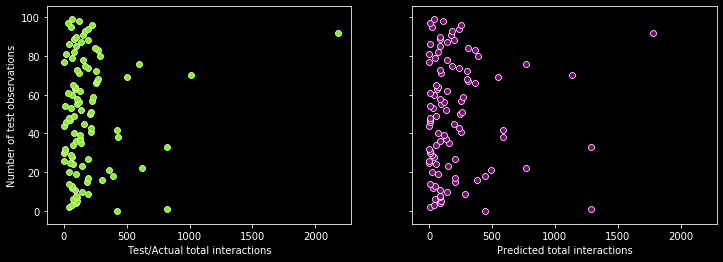

In [36]:
## Visualising the test and actual results for Decision Tree Regression model
plt.style.use('dark_background')
fig, axes = plt.subplots(1,2,figsize=(12,4),sharex=True,sharey=True,squeeze=False)
s1 = sns.scatterplot(y_test,mylist,color='lawngreen',ax=axes[0][0])
s2 = sns.scatterplot(y_pred,mylist,color='purple',ax=axes[0][1])
s1.set_xlabel('Test/Actual total interactions')
s2.set_xlabel('Predicted total interactions')
plt.setp(axes[:, 0], ylabel='Number of test observations')
plt.show()

----

### Linear SVM Regression model

In [37]:
#Training the Kernel SVM Regression model on the training set
from sklearn.svm import SVR
regressor = SVR(kernel='linear')
regressor.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
#Predicting test results
y_pred = sc_y.inverse_transform(regressor.predict(x_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[ 5.83e+02  4.21e+02]
 [ 1.14e+03  8.23e+02]
 [-2.23e+01  3.90e+01]
 [-6.06e+00  6.30e+01]
 [ 5.54e+01  9.50e+01]
 [ 8.17e+01  1.08e+02]
 [ 4.29e+01  7.50e+01]
 [ 1.02e+02  1.03e+02]
 [ 5.24e+01  9.80e+01]
 [ 2.00e+02  1.93e+02]
 [ 1.18e+02  1.44e+02]
 [ 3.04e+01  8.50e+01]
 [ 2.50e+01  6.20e+01]
 [-9.55e+00  6.70e+01]
 [-4.78e+01  3.80e+01]
 [ 2.16e+02  1.80e+02]
 [ 3.75e+02  3.05e+02]
 [ 2.10e+02  1.88e+02]
 [ 5.06e+02  3.87e+02]
 [ 7.64e+01  1.00e+02]
 [-4.69e+01  4.20e+01]
 [ 4.53e+02  3.55e+02]
 [ 8.74e+02  6.24e+02]
 [ 1.47e+02  1.48e+02]
 [ 1.01e+01  7.10e+01]
 [-1.43e+00  4.90e+01]
 [-1.11e+02  0.00e+00]
 [ 2.48e+02  1.89e+02]
 [-3.46e+00  6.50e+01]
 [-2.44e+01  5.40e+01]
 [-9.40e+01  2.00e+00]
 [-9.42e+01  9.00e+00]
 [-3.23e+01  7.00e+00]
 [ 1.09e+03  8.18e+02]
 [ 2.06e+01  7.50e+01]
 [ 1.23e+02  1.37e+02]
 [ 7.37e+01  9.90e+01]
 [ 1.03e+02  1.25e+02]
 [ 5.42e+02  4.29e+02]
 [ 9.16e+01  1.28e+02]
 [ 5.50e+01  8.30e+01]
 [ 2.66e+02  2.14e+02]
 [ 5.56e+02  4.20e+02]
 [ 2.44e+02

In [39]:
## Calculating r2 score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7461056161687489

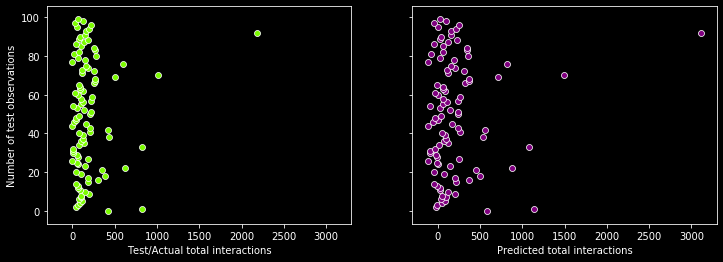

In [40]:
## Visualising the test and actual results for Kernel SVM Regression model
plt.style.use('dark_background')
fig, axes = plt.subplots(1,2,figsize=(12,4),sharex=True,sharey=True,squeeze=False)
s1 = sns.scatterplot(y_test,mylist,color='lawngreen',ax=axes[0][0])
s2 = sns.scatterplot(y_pred,mylist,color='purple',ax=axes[0][1])
s1.set_xlabel('Test/Actual total interactions')
s2.set_xlabel('Predicted total interactions')
plt.setp(axes[:, 0], ylabel='Number of test observations')
plt.show()